In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display all columns when printing the DataFrame
# pd.set_option('display.max_columns', None)

# Load dataset
url = "F:\\AWFERA\\Machine learning\\AwferaMachineLearningProjects\\titanic_dataset.csv"
data = pd.read_csv(url)

# Show the first 5 records to understand the structure
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
len(data)

891

In [4]:
# Explore datatypes, nulls, and summary statistics.

print("\nDataset Info:")
data.info()

print("\nSummary of Numerical Columns:")
display(data.describe())

print("\nMissing Values Per Column:")
print(data.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB

Summary of Numerical Columns:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing Values Per Column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


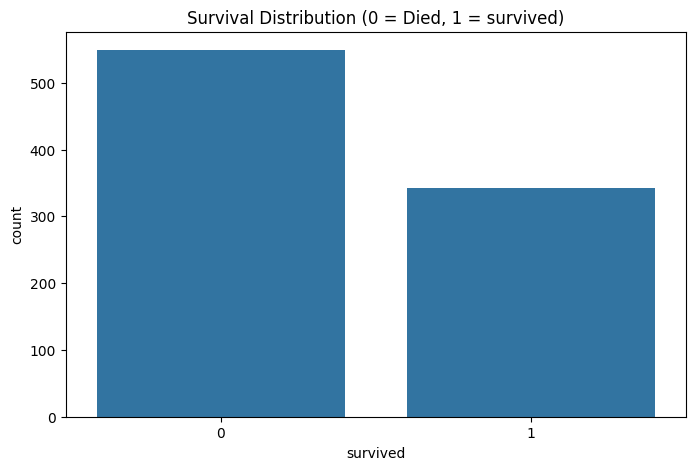

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x='survived', data=data)
plt.title("Survival Distribution (0 = Died, 1 = survived)")
plt.show()


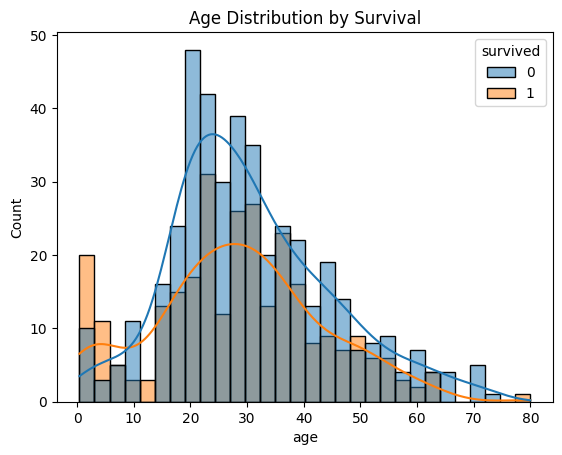

In [6]:
sns.histplot(data=data, x='age', hue='survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()

In [7]:
#Handling Missing Values
#Impute missing numerical and categorical values appropriately.

from sklearn.impute import SimpleImputer

#impute Age With Median 
age_imputer = SimpleImputer(strategy = 'median')
data['age'] = age_imputer.fit_transform(data[['age']])

# impute Embarked with most frequent value 
data['embarked'] = SimpleImputer(strategy = 'most_frequent').fit_transform(data[['embarked']]).ravel()

#Drop Deck columns 
data.drop(columns = ['deck'], inplace = True)

#Confirm missing values handled

print("\nRemeining Missing Values:")
print(data.isnull().sum())


Remeining Missing Values:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [8]:
#Encode 'Sex' and 'Embarked' using Label Encoding.
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

data['sex'] = le_sex.fit_transform(data['sex'])
data['embarked'] = le_embarked.fit_transform(data['embarked'])

In [9]:
#Drop irrelevant features
data.drop(columns = ['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], inplace=True)

print("\nData After Preprocessing: ")
display(data.head())


Data After Preprocessing: 


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [11]:
from sklearn.model_selection import train_test_split

X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")



Training Samples: 712
Testing Samples: 179
